# Vector/Tensors operations
Group: Yulisa Niño, Miguel Granados, Juan Camilo Samriento

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Getting to know how to extract image with PIL:

('R', 'G', 'B')
0
(382, 300, 3)


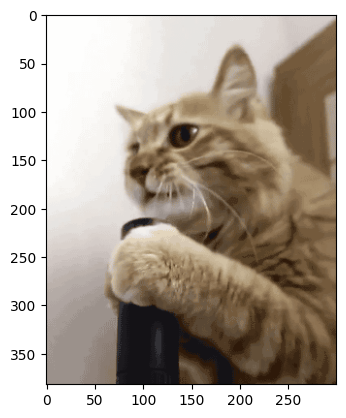

In [2]:
gif = Image.open("catgif.gif")
rgbgif=gif.convert("RGB")
print(rgbgif.getbands())
rgbgif.seek(rgbgif.tell())
print(rgbgif.tell())
frame=np.array(rgbgif)
print(frame.shape)
plt.imshow(frame)

In [3]:
type(frame[0,0,0])

numpy.uint8

Test on image merging to darken or brighten the video:

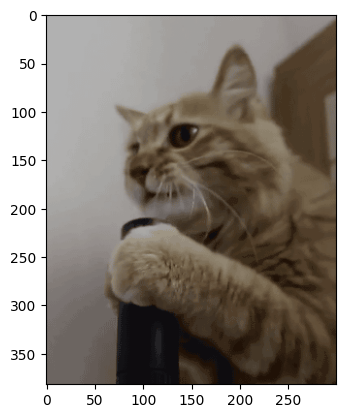

In [4]:
black=np.zeros(frame.shape,dtype='uint8')
white=np.ones(frame.shape,dtype='uint8')*255

#blend image with black to darken, or white to brighten,alpha is percentage
alpha=0.3
darkcat=np.uint8((1-alpha)*frame+(alpha)*black)
plt.imshow(darkcat)


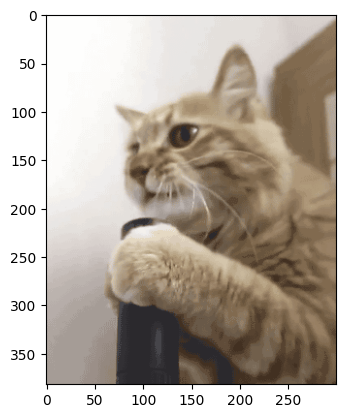

In [5]:
alpha=0.1
darkcat=np.uint8((1-alpha)*frame+(alpha)*white)
plt.imshow(darkcat)

Defining functions to change the brightness of video:

In [6]:
def combine(frame,mat,alpha):
    result=np.uint8((1-alpha)*frame+(alpha)*mat)
    return result

In [7]:
def change_brightness_frame(frame,alpha,brighter):
    if brighter:
        mat=np.ones(frame.shape,dtype='uint8')*255
    else:
        mat=np.zeros(frame.shape,dtype='uint8')
    result=combine(frame,mat,alpha)
    return result

In [8]:
def change_brightness_gif(name:str,brighter:bool,percent):
    im = Image.open(name)
    images=[]
    frame_duration = im.info['duration']
    try:
        while 1:
            frame_duration = im.info['duration']  # returns current frame duration in milli sec.
            im.seek(im.tell()+1)
            # print(im.tell())
            a = np.array(im)
            images.append(Image.fromarray(change_brightness_frame(a,alpha=percent,brighter=brighter)))
            # print(a.shape)
            # display(im,imga)    
    except EOFError:
        pass # end of sequence
    
    n_per=str(percent)
    if brighter:
        n="_brighter_"+n_per.replace("0.","")+".gif"
    else:
        n="_darker_"+n_per.replace("0.","")+".gif"
    #Save brighter or darker gif
    images[0].save(name[:-4]+n,save_all=True, append_images=images[1:], optimize=False,duration=frame_duration, loop=0)
    

In [9]:
change_brightness_gif("catgif.gif",brighter=True,percent=0.4)

Defining functions to add elements to the video:

In [10]:
def add_line_2_frame(frame,channel,row,col,axis):
    if channel=="R":
        ch_tup=(1,2)
    if channel=="G":
        ch_tup=(0,2)
    if channel=="B":
        ch_tup=(0,1)
    if axis==0:
        frame[row,:,ch_tup]=0
    if axis==1:
        frame[:,col,ch_tup]=0
    return frame

In [11]:
def add_lines_gif(name):
    im = Image.open(name)
    images=[]
    frame_duration = im.info['duration']
    try:
        while 1:
            im.seek(im.tell()+1)
            a = np.array(im)
            if im.tell()%3==0:
                channel="R"
            if im.tell()%3==1:
                channel="G"
            if im.tell()%3==2:
                channel="B"
            # Add lines of different colors in random rows aand columns of each frame
            new=add_line_2_frame(a,channel,np.random.randint(0,a.shape[0]),np.random.randint(0,a.shape[1]),axis=im.tell()%2)
            images.append(Image.fromarray(new))
    except EOFError:
        pass # end of sequence

    #Save gif with random color lines
    images[0].save(name[:-4]+"_lines.gif",save_all=True, append_images=images[1:], optimize=False,duration=frame_duration, loop=0)

In [12]:
add_lines_gif("catgif.gif")

Defining functions to detect the number of frame where the pipe shows the most in the video:

In [97]:
def rgb_2_bw(image,method='ave'):
    bw=np.zeros((image.shape[0],image.shape[1]),dtype='uint8')
    if method=="ave":
        bw+=np.uint8(image[:,:,0]/3)
        bw+=np.uint8(image[:,:,1]/3)
        bw+=np.uint8(image[:,:,2]/3)
    if method=="weight": 
        bw+=np.uint8(image[:,:,0]*0.2627)
        bw+=np.uint8(image[:,:,1]*0.678)
        bw+=np.uint8(image[:,:,2]*0.0593)

    # See more at https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm
    # See more at https://en.wikipedia.org/wiki/Grayscale
    # Y'=0.299R'+0.587G'+0.114B'
    # Y'=0.2126R'+0.7152G'+0.0722B'.
    # Y'=0.2627R'+0.6780G'+0.0593B'

    return bw

(382, 300)


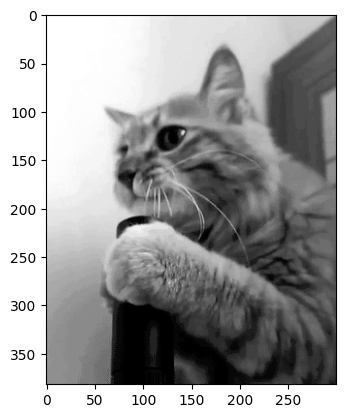

In [98]:
im = Image.open("catgif.gif")
im.seek(im.tell()+1)
a = np.array(im)
n=rgb_2_bw(a,'ave')
print(n.shape)
plt.imshow(n,cmap='gray')

(382, 300)


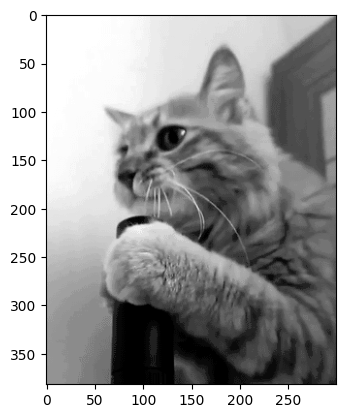

In [99]:
im = Image.open("catgif.gif")
im.seek(im.tell()+1)
a = np.array(im)
n=rgb_2_bw(a,'weight')
print(n.shape)
plt.imshow(n,cmap='gray')

In [116]:
def get_avg_image(image):
    average=np.sum(image)/(image.shape[0]*image.shape[1])
    average=np.average(image)
    return average

In [117]:
def get_sum_image(image):
    suma=np.sum(image)
    return suma

In [118]:
im = Image.open("catgif.gif")
im.seek(im.tell()+1)
a = np.array(im)
print(get_avg_image(rgb_2_bw(a)))
im.seek(im.tell()+1)
a = np.array(im)
print(get_avg_image(rgb_2_bw(a)))
print(get_sum_image(np.ones((a.shape[0],a.shape[1]))*255))

141.3916230366492
140.5117277486911
29223000.0


In [137]:
def get_pipe_frame(name,type_b):
    im = Image.open(name)
    min_average=255
    n_frame=0
    try:
        while 1:
            im.seek(im.tell()+1)
            a = np.array(im)
            average_frame=get_avg_image(rgb_2_bw(a,type_b))
            # print(average_frame,im.tell())
            if average_frame<min_average:
                min_average=average_frame
                n_frame=im.tell()
                frame_pipe=a.copy()
    except EOFError:
        pass # end of sequence

    print(f"The frame where the pipe es shown the most is frame No. {n_frame}")
    plt.imshow(frame_pipe)
    # plt.imshow(rgb_2_bw(frame_pipe,type_b),cmap='gray')

The frame where the pipe es shown the most is frame No. 3


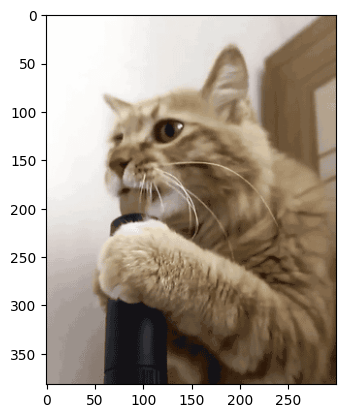

In [138]:
get_pipe_frame("catgif.gif",type_b="ave")

The frame where the pipe es shown the most is frame No. 3


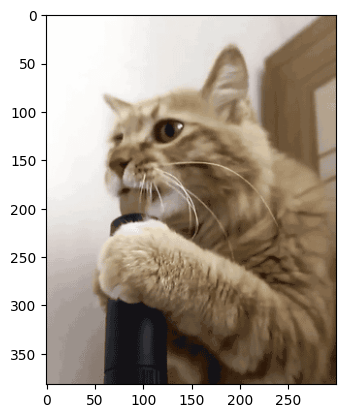

In [139]:
get_pipe_frame("catgif.gif",type_b="weight")